In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# T-dependence of Average Internal Energy, $<E>$

In [3]:
# Constants
T_values = np.linspace(300, 1200, 4)  # in Kelvin
R = 8.314  # J/mol·K
K_B = 0.695032  # cm^-1·K^-1
hcNa = 1.986e-23 * 6.022e23  # J·mol^-1·cm
F = hcNa

# Fluorine electronic states (degeneracy g and energy in cm^-1)
g0, e0 = 4, 0
g1, e1 = 2, 404.0
g2, e2 = 6, 102406.5

results = []

for T in T_values:
    beta = 1 / (K_B * T)

    # Partition function and electronic energy
    q_elec = g0 + g1 * np.exp(-beta * e1) + g2 * np.exp(-beta * e2)
    num_elec = (g0 * e0 + g1 * e1 * np.exp(-beta * e1) + g2 * e2 * np.exp(-beta * e2))
    E_elec = (num_elec / q_elec) * F  # J/mol

    # Translational energy
    E_trans = (3 / 2) * R * T  # J/mol

    # Total energy
    E_total = E_trans + E_elec

    results.append({
        "Temperature (K)": T,
        "⟨E_trans⟩ (J/mol)": E_trans,
        "⟨E_elec⟩ (J/mol)": E_elec,
        "⟨E_total⟩ (J/mol)": E_total
    })

# Create DataFrame
df_results = pd.DataFrame(results)
df_results['E_total,NIST (J/mol)'] = [10617, 'N/A', 'N/A', 'N/A']
df_results = df_results.round(3)

df_results

,Temperature (K),⟨E_trans⟩ (J/mol),⟨E_elec⟩ (J/mol),⟨E_total⟩ (J/mol),"E_total,NIST (J/mol)"
0,300.0,3741.3,324.634,4065.934,10617
1,600.0,7482.6,770.675,8253.275,N/A
2,900.0,11223.9,1003.424,12227.324,N/A
3,1200.0,14965.2,1137.846,16103.046,N/A


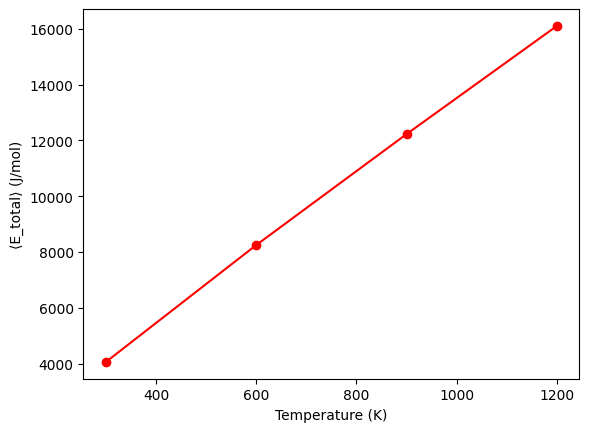

In [4]:
# plot
plt.plot(df_results['Temperature (K)'], df_results['⟨E_total⟩ (J/mol)'],marker='o' ,color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('⟨E_total⟩ (J/mol)')
plt.show()

#T-dependence of $C_{V,m}$

In [5]:
C_vc = (3/2) * R
print(f"Calculated C_V,m = {C_vc:.3f} J/mol·K")

C_p300K = 20.8 # J/mol K
C_v300K = C_p300K - R
print(f"McQuarry C_V,m = {C_v300K:.3f} J/mol·K")


Calculated C_V,m = 12.471 J/mol·K
McQuarry C_V,m = 12.486 J/mol·K


#T-dependence of P

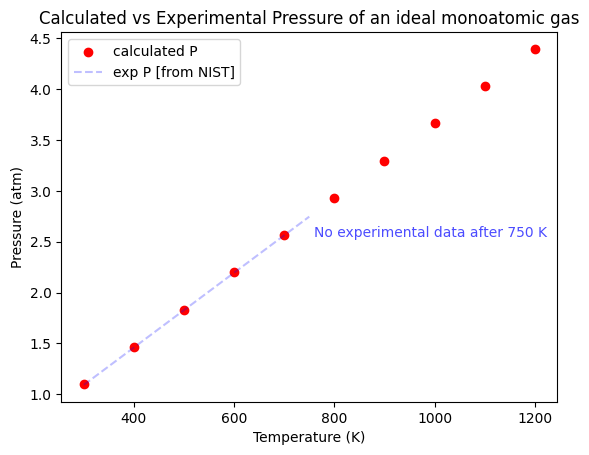

In [11]:
V = 22.4 # L , molar volume
n = 1 # mol
R = 0.082057 # L atm / mol K
T = np.linspace(300,1200,10)

Pc = n*R*T/V

nist = {"Pressure" : [1.0927, 1.4240, 1.7549, 2.0857, 2.4164, 2.7471],
        "Temperature" : [300,390,480,570,660,750]}

plt.scatter(T,Pc,label='calculated P',color='red')
plt.plot(nist['Temperature'],nist['Pressure'],label='exp P [from NIST]',color='blue', linestyle='--',alpha = 0.25)
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (atm)')
plt.title('Calculated vs Experimental Pressure of an ideal monoatomic gas')
plt.text(760,2.55, 'No experimental data after 750 K', color='blue', alpha=0.7)
plt.legend()
plt.show()

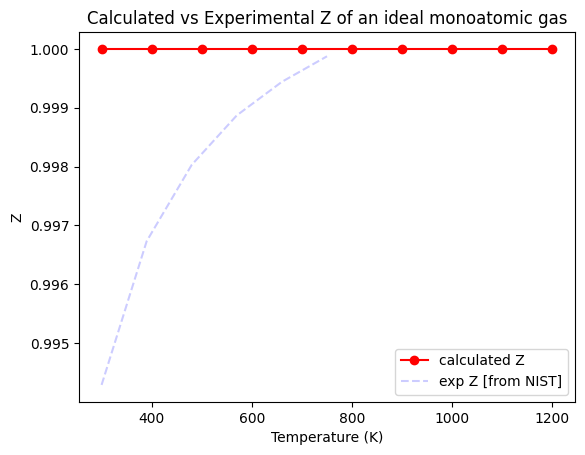

In [12]:
Zc = Pc * V / (n * R * T)
Ze = pd.to_numeric(nist['Pressure']) * V / (n * R * pd.to_numeric(nist['Temperature']))

plt.plot(T,Zc,label='calculated Z',color='red',marker='o')
plt.plot(nist['Temperature'],Ze,label='exp Z [from NIST]',color='blue', linestyle='--',alpha = 0.2)
plt.xlabel('Temperature (K)')
plt.ylabel('Z')
plt.title('Calculated vs Experimental Z of an ideal monoatomic gas')
#plt.text(750, 0.999,'No experimental data after 750 K', color='blue', alpha=0.7)
plt.legend()
plt.show()